,emp_no
salary group,
40-59K,121043
60-79k,66219
80-100k,16129
100-119k,1263
>=120k,24


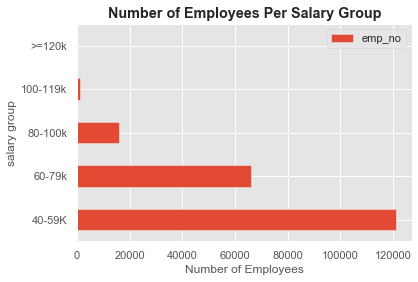

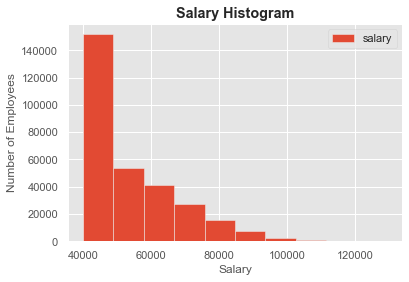

In [22]:
import numpy as np
from sqlalchemy import create_engine
import pandas as pd
from config import username, password
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import style
style.use('ggplot')


engine = create_engine('postgresql+psycopg2://{}:{}@localhost:5432/HW_test'.format(username,password))
connection = engine.connect()
sql = 'Select emp_no, salary from "Salaries"'
data_s = pd.read_sql(sql=sql,con=connection)
bins = [40000,60000,80000,100000,120000,150000]
labels = ['40-59K','60-79k','80-100k','100-119k','>=120k']
data_s['salary group'] = pd.cut(data_s['salary'],bins=bins,labels=labels)
data_s.head()
data_s_grouped = data_s.groupby('salary group')
df_s = pd.DataFrame(data_s_grouped['emp_no'].count())
display(df_s.head())

df_s.plot.barh()
plt.xlabel('Number of Employees')

plt.title('Number of Employees Per Salary Group',fontweight='bold')
plt.show()

print('\n\n\n\n\n')

data_s[['salary']].plot.hist()
plt.xlabel('Salary')
plt.title('Salary Histogram',fontweight='bold')
plt.ylabel('Number of Employees')
plt.show()



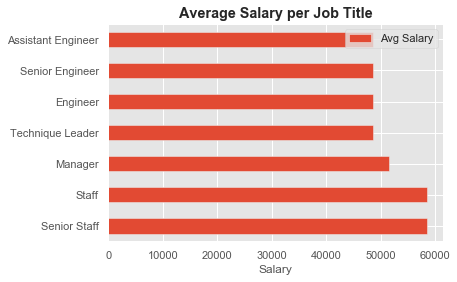

In [23]:
sql_titles = 'Select t.title, round(avg(s.salary),2) as "Avg Salary"from "Titles" t left join "Salaries" s on t.emp_no = s.emp_no group by t.title order by "Avg Salary" desc'
data = pd.read_sql(sql=sql_titles,con=connection).set_index('title')



data.plot.barh()
plt.title('Average Salary per Job Title', fontweight='bold')
plt.xlabel('Salary')
plt.ylabel('')
plt.show()

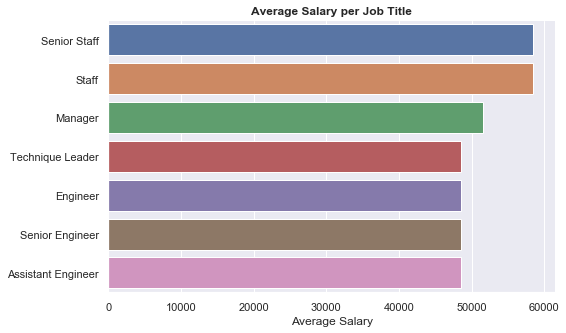

-------------------------------------------------------------------------------------


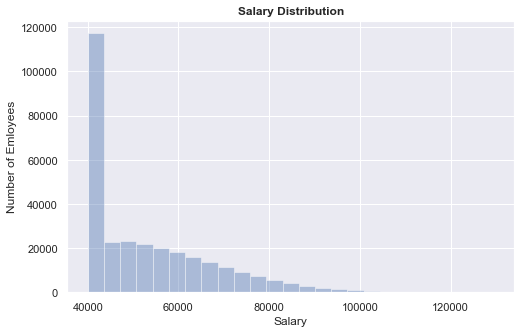

-------------------------------------------------------------------------------------


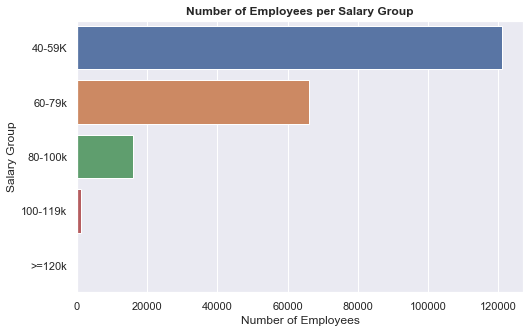

In [67]:
import seaborn as sns
sns.set(style='darkgrid')
fig, ax = plt.subplots(figsize=(8,5))
sns.barplot(x='Avg Salary',y=data.index,data=data)
ax.set_title('Average Salary per Job Title', fontweight='bold')
ax.set(ylabel='',xlabel='Average Salary')
sns.despine(top=True,right=True)
plt.show()


print('-'*85)


fig, ax = plt.subplots(figsize=(8,5))
sns.distplot(data_s['salary'],kde=False,bins=25)
ax.set_title('Salary Distribution', fontweight='bold')
ax.set(ylabel='Number of Emloyees', xlabel='Salary')
plt.show()


print('-'*85)

fig, ax = plt.subplots(figsize=(8,5))
sns.barplot(x='emp_no',y=df_s.index, data=df_s)
ax.set_title('Number of Employees per Salary Group', fontweight='bold')
ax.set(xlabel='Number of Employees', ylabel='Salary Group')
plt.show()